## Amazon Prime Users Assignment
### Lecture Session: TC2L
### Group A128 Member:
### 1. Ng Xhun Yan (251UC250X9)
### 2. Koh Soon Keat (251UC250F2)

### Import all necessary libraries for analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from datetime import datetime

## Exploratory Data Analysis
### Reading the data into pandas dataframe
Reading the data into pandas dataframe for analysis. Printing out the basic information such as shape of the dataframe, first 5 rows of the record and the data type for each feature (column).


In [2]:
Amazon_Prime = pd.read_csv('Amazon_Prime_Users.csv')
print("Rows, Columns:", Amazon_Prime.shape)
display(Amazon_Prime.head(5))
Amazon_Prime.info()

Rows, Columns: (2530, 19)


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,3/6/1953,Male,Rebeccachester,15/1/2024,14/1/2025,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3.0
1,2,Scott Allen,scott22@example.org,scott22,8/7/1978,Male,Mcphersonview,7/1/2024,6/1/2025,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7.0
2,3,Jonathan Parrish,brooke16@example.org,brooke16,6/12/1994,Female,Youngfort,13/4/2024,13/4/2025,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8.0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,22/12/1964,Female,Feliciashire,24/1/2024,23/1/2025,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7.0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,4/6/1961,Male,Port Deborah,14/2/2024,13/2/2025,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2530 non-null   int64  
 1   Name                           2530 non-null   object 
 2   Email Address                  2530 non-null   object 
 3   Username                       2530 non-null   object 
 4   Date of Birth                  2530 non-null   object 
 5   Gender                         2530 non-null   object 
 6   Location                       2530 non-null   object 
 7   Membership Start Date          2530 non-null   object 
 8   Membership End Date            2530 non-null   object 
 9   Subscription Plan              2530 non-null   object 
 10  Payment Information            2530 non-null   object 
 11  Renewal Status                 2530 non-null   object 
 12  Usage Frequency                2530 non-null   o

Performing some basic data exploration for basic understanding of the data.
The following criteria were plotted into charts to understand the general distribution more before proceeding to **Data Preprocessing**
1. Gender Distribution
2. Renewal Status (Manual/Auto-renew)

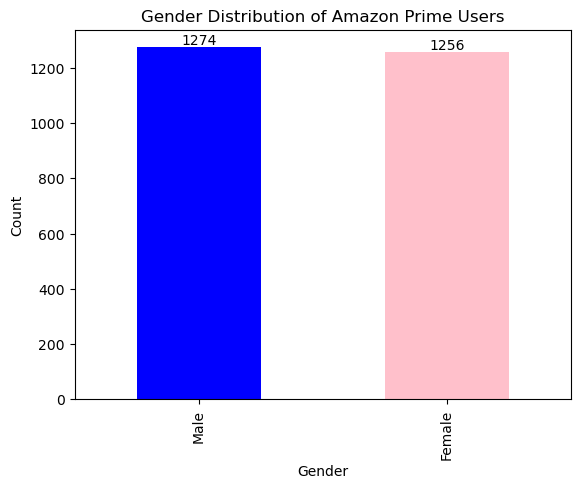

In [3]:
ax = Amazon_Prime['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Gender Distribution of Amazon Prime Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

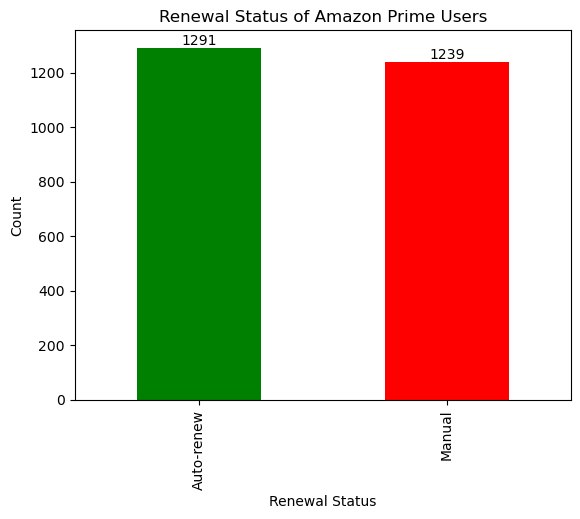

In [4]:
ax = Amazon_Prime['Renewal Status'].value_counts().plot(kind='bar', color=['green', 'red'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Renewal Status of Amazon Prime Users')
plt.xlabel('Renewal Status')
plt.ylabel('Count')
plt.show()

## Data Preprocessing
### Data Cleaning
#### Cleaning Null Entry
This step is to check for any **null** entry before any furthur analysis. It is crucial to deal with **null** values as they may create errors during the analysis phase.
We are going to start by checking the count of **null** entry.

In [5]:
Amazon_Prime.isnull().sum()

User ID                           0
Name                              0
Email Address                     0
Username                          0
Date of Birth                     0
Gender                            0
Location                          0
Membership Start Date             0
Membership End Date               0
Subscription Plan                 0
Payment Information               0
Renewal Status                    0
Usage Frequency                   0
Purchase History                  0
Favorite Genres                   0
Devices Used                      0
Engagement Metrics                0
Feedback/Ratings                 16
Customer Support Interactions    13
dtype: int64

Since the null entries are not significant (standing at 29) compare to the dataset, **Listwise Deletion** is use to handle null entries.

In [6]:
Amazon_Prime = Amazon_Prime.dropna()
print(Amazon_Prime.isnull().sum())
Amazon_Prime.shape

User ID                          0
Name                             0
Email Address                    0
Username                         0
Date of Birth                    0
Gender                           0
Location                         0
Membership Start Date            0
Membership End Date              0
Subscription Plan                0
Payment Information              0
Renewal Status                   0
Usage Frequency                  0
Purchase History                 0
Favorite Genres                  0
Devices Used                     0
Engagement Metrics               0
Feedback/Ratings                 0
Customer Support Interactions    0
dtype: int64


(2501, 19)

#### Duplicate Entries
It is crucial to check if there is any duplicate entries in the dataset. Duplicate entries should be handled as it will affect the statistics of the dataset when performing analysis later on.

In [7]:
Amazon_Prime.duplicated().sum()

np.int64(30)

In this dataset, it is observed that 30 duplicate entries were recorded in this dataset. Let's handle the duplicate entries by removing it. Removing the entry is to make sure that the data mining does not bias towards duplicate entries.

In [8]:
Amazon_Prime = Amazon_Prime.drop_duplicates()
Amazon_Prime.duplicated().sum()

np.int64(0)

Let's check the shape of the data after handling duplicate and null entries.

In [9]:
print('Rows, Columns:', Amazon_Prime.shape)

Rows, Columns: (2471, 19)


### Data Transformation
Let's transform the date features (columns) from string to date format for subsequent analysis.

In [10]:
Amazon_Prime['Date of Birth'] = pd.to_datetime(Amazon_Prime['Date of Birth'], format='%d/%m/%Y')
Amazon_Prime['Membership Start Date'] = pd.to_datetime(Amazon_Prime['Membership Start Date'], format='%d/%m/%Y')
Amazon_Prime['Membership End Date'] = pd.to_datetime(Amazon_Prime['Membership End Date'], format='%d/%m/%Y')
Amazon_Prime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2471 entries, 0 to 2529
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   User ID                        2471 non-null   int64         
 1   Name                           2471 non-null   object        
 2   Email Address                  2471 non-null   object        
 3   Username                       2471 non-null   object        
 4   Date of Birth                  2471 non-null   datetime64[ns]
 5   Gender                         2471 non-null   object        
 6   Location                       2471 non-null   object        
 7   Membership Start Date          2471 non-null   datetime64[ns]
 8   Membership End Date            2471 non-null   datetime64[ns]
 9   Subscription Plan              2471 non-null   object        
 10  Payment Information            2471 non-null   object        
 11  Renewal Status        

#### Adding Age Column 
Adding the age column for analysis. To do so we are going to use *January 1st 2025* as the cut off date to calculate the age of the user.

In [11]:
birthday_cut_off = pd.to_datetime('2025-01-01')
Amazon_Prime['Age'] = ((birthday_cut_off - Amazon_Prime['Date of Birth']).dt.days / 365.25).astype(int)
Amazon_Prime.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions,Age
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3.0,71
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7.0,46
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8.0,30
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7.0,60
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1.0,63


#### Adding Age Group
After adding the **age** column, we can discretize the age into age group. By discretize them into age group, we can find out the interested age group for following analysis.
*Association Rule Mining* can only handle categorical data or discrete data. Due to the nature of it, it is important to transform continuous data into discrete data. In this case, we chose to bin it for analysis.
The age group will be binned into one of the following categories:
1. Below 18 (<18)
2. 18-30 (18-30)
2. 31-40 (31-40)
2. 41-60 (41-60)
2. Above 60 (60+)

In [12]:
Amazon_Prime['Age Group'] = pd.cut(Amazon_Prime['Age'], 
                         bins=[0,18,30,40,60,200], 
                         labels=['<18','18-30','31-40','41-60','60+'])

For Feedback/Ratings column, we are also going to discretize it into categorical data, according to the following rule:
1. 0-3 (Low)
2. 3.1 - 4 (Medium)
3. 4.1 - 5 (High)

In [13]:
Amazon_Prime['Feedback Category'] = pd.cut(Amazon_Prime['Feedback/Ratings'], bins=[0, 3, 4, 5], labels=['Low', 'Medium', 'High'])
Amazon_Prime[['Feedback/Ratings', 'Feedback Category']].head()


,Feedback/Ratings,Feedback Category
0,3.6,Medium
1,3.8,Medium
2,3.3,Medium
3,3.3,Medium
4,4.3,High


### Exploratory Data Analysis
Let's explore the data again after cleaning the data. Let's start with the summary of the data.


In [14]:
print("Numerical Data Statistics: ")
display(Amazon_Prime.describe(include=['number']))
print("Categorical Data Statistics: ")
display(Amazon_Prime.describe(include=['object']))

Numerical Data Statistics: 


,User ID,Feedback/Ratings,Customer Support Interactions,Age
count,2471.000000,2471.000000,2471.000000,2471.000000
mean,1253.832052,4.006758,4.963982,54.707811
std,722.039648,0.577527,3.188656,21.075102
min,1.000000,3.000000,0.000000,18.000000
25%,631.500000,3.500000,2.000000,36.000000
50%,1256.000000,4.000000,5.000000,55.000000
75%,1879.500000,4.500000,8.000000,73.000000
max,2500.000000,5.000000,10.000000,91.000000


Categorical Data Statistics: 


,Name,Email Address,Username,Gender,Location,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics
count,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471,2471
unique,2429,2453,2432,2,2244,2,3,2,3,3,7,3,3
top,Michael Smith,njohnson@example.org,scott11,Male,East Robert,Annual,Mastercard,Auto-renew,Frequent,Books,Action,Smartphone,High
freq,3,2,3,1245,5,1255,850,1262,843,840,377,855,835


Let's check out the distribution between monthly and annual subscription by users.

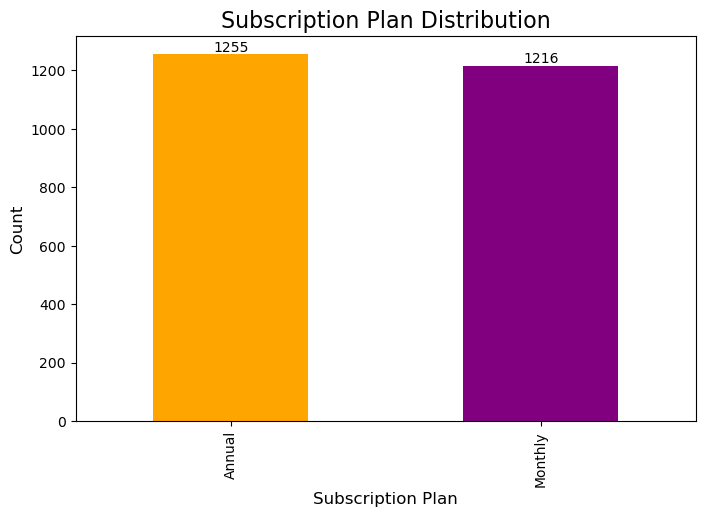

In [30]:
ax = Amazon_Prime['Subscription Plan'].value_counts().plot(
	kind='bar',
	color=['orange', 'purple'], 
	figsize=(8,5),	
	legend=False	 
)
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Subscription Plan Distribution', fontsize=16)
plt.xlabel('Subscription Plan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Next, let's check the age distribution of the dataset. We are also going to check for the count in each age category.


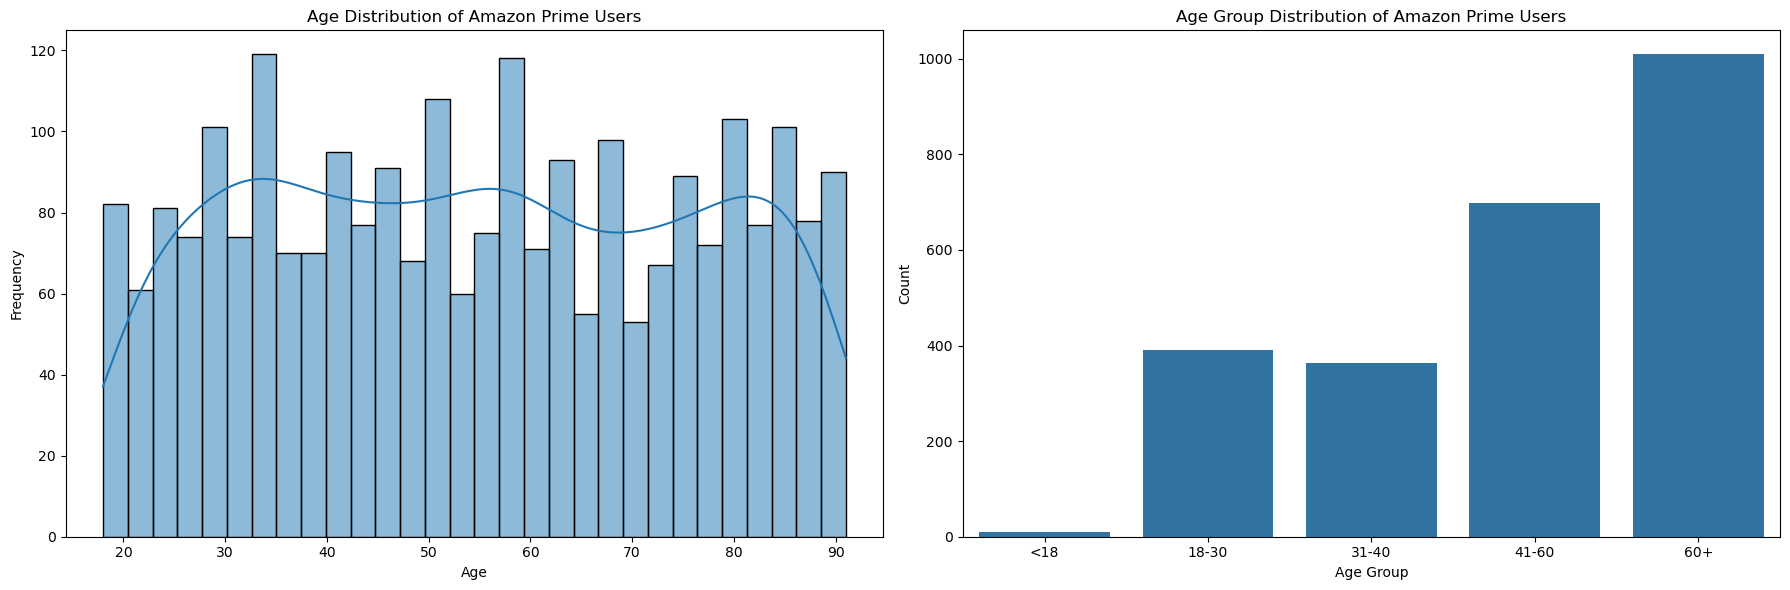

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First Plot (Left side): Histogram
sns.histplot(Amazon_Prime['Age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution of Amazon Prime Users')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Second Plot (Right side): Countplot
sns.countplot(x=Amazon_Prime['Age Group'], ax=axes[1])
axes[1].set_title('Age Group Distribution of Amazon Prime Users')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

On the graph above, it is observed that the age distribution is a multi modal distribution, with the peak of 30-40, 50-60. According to the KDE line, we can see that the distribution has 3 peaks. Despite of its peak, we have grouped the users into different age group bins, and we can find that the age group of **60+** is the largest compared to other age groups.

Next, let's explore the gender distribution and the renewal status distribution.

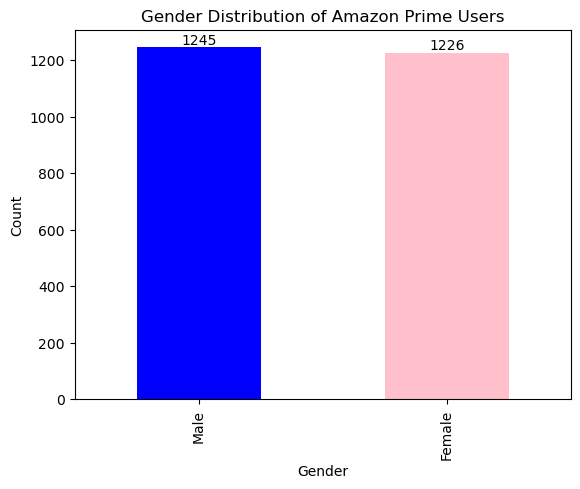

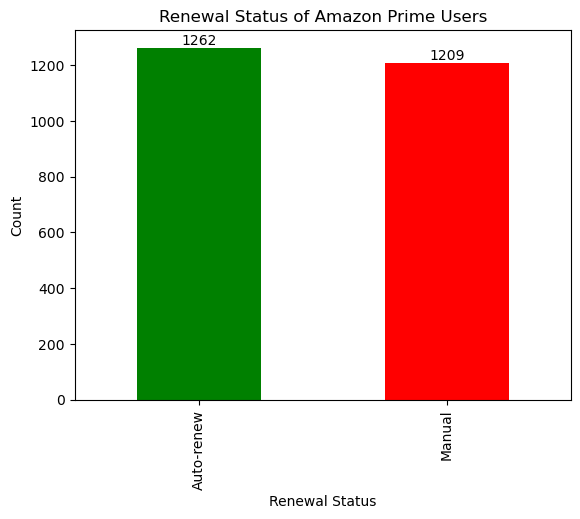

In [16]:
ax = Amazon_Prime['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Gender Distribution of Amazon Prime Users')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

ax = Amazon_Prime['Renewal Status'].value_counts().plot(kind='bar', color=['green', 'red'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Renewal Status of Amazon Prime Users')
plt.xlabel('Renewal Status')
plt.ylabel('Count')
plt.show()

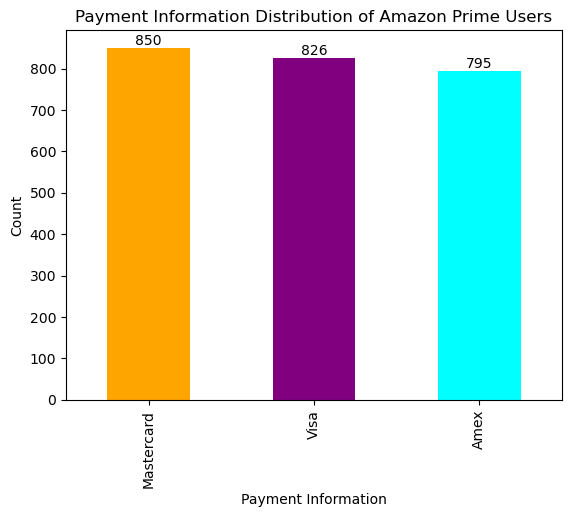

In [17]:
ax = Amazon_Prime['Payment Information'].value_counts().plot(kind='bar', color=['orange', 'purple', 'cyan'])
for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Payment Information Distribution of Amazon Prime Users')
plt.xlabel('Payment Information')
plt.ylabel('Count')
plt.show()

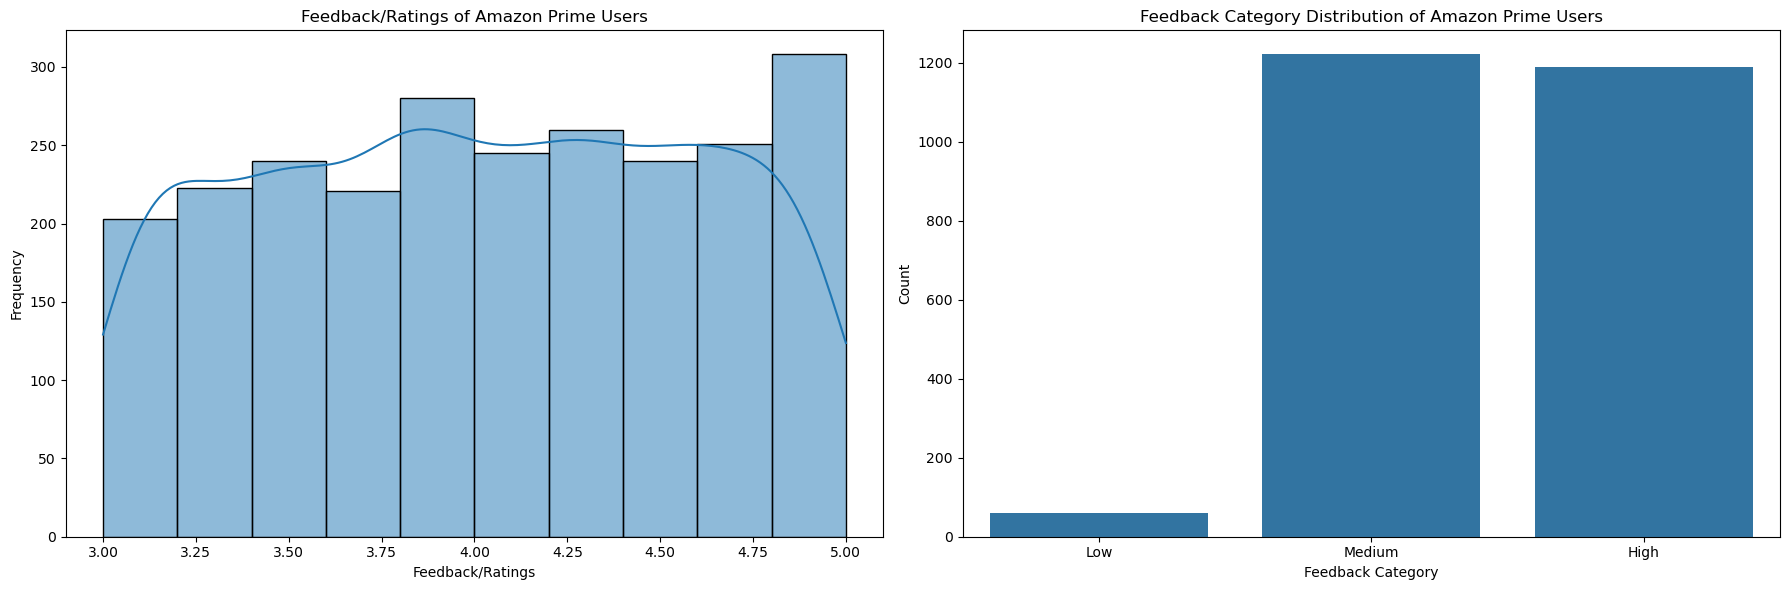

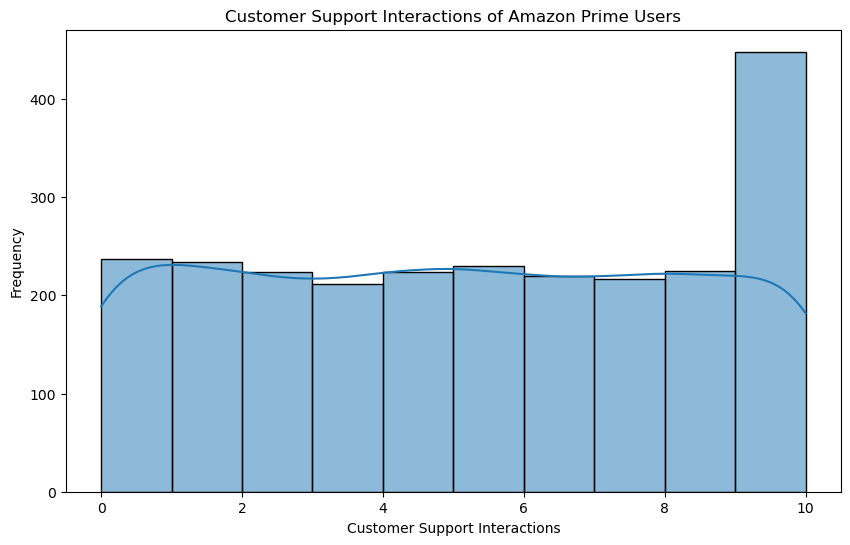

In [18]:
# 1. Plotting chart that can fit both plots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 2. First Plot (Left side): Histogram
sns.histplot(Amazon_Prime['Feedback/Ratings'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Feedback/Ratings of Amazon Prime Users')
axes[0].set_xlabel('Feedback/Ratings')
axes[0].set_ylabel('Frequency')

# 3. Second Plot (Right side): Countplot
sns.countplot(x=Amazon_Prime['Feedback Category'], ax=axes[1])
axes[1].set_title('Feedback Category Distribution of Amazon Prime Users')
axes[1].set_xlabel('Feedback Category')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()

#  Plotting chart that shows the Customer Support Interactions information
plt.figure(figsize=(10, 6))
sns.histplot(Amazon_Prime['Customer Support Interactions'], bins=10, kde=True)
plt.title('Customer Support Interactions of Amazon Prime Users')
plt.xlabel('Customer Support Interactions')
plt.ylabel('Frequency')
plt.show()

### Association Rule Mining
For association rule mining, we decided to use **FP-Growth** as it is less computing intense compared to apriori.
Below is to import the necessary libraries for association rule mining.

In [19]:
# Import necessary libraries for association rule mining
from mlxtend.frequent_patterns import association_rules, fpgrowth
# Setting the output to display full column content
pd.set_option('display.max_colwidth', None)


Here, we are going to prepare the data for **FP-Growth**. We are going to select certain columns that we are interested in to answer a few questions. The columns selected are as such:
1. Age Group
2. Usage Frequency
3. Feedback Category
4. Engagement Metrics
5. Subscription Plan
6. Renewal Status
7. Favorite Genres
8. Devices Used
9. Payment Information

After performing *Association Rule Mining* with **FP-Growth**, we are going to select the rules that satisfy the following criteria
|Criteria|Minimum Threshold|
|:--------|:---------:|
|Support| 0.02 (2%)|
|Confidence| 0.5 (50%)|

In [20]:
Amazon_Prime_arm = Amazon_Prime.copy()
arm_data = Amazon_Prime_arm[['Age Group', 'Usage Frequency', 'Feedback Category', 'Engagement Metrics', 'Subscription Plan', 'Renewal Status', 'Favorite Genres', 'Devices Used', 'Payment Information']]
arm_data = pd.get_dummies(arm_data)
frequent_itemsets = fpgrowth(arm_data, min_support=0.02, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets[:5])
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("\nAssociation Rules:\n", rules[:5])


Frequent Itemsets:
     support                          itemsets
0  0.507892        (Subscription Plan_Annual)
1  0.494132        (Feedback Category_Medium)
2  0.489276           (Renewal Status_Manual)
3  0.408337                   (Age Group_60+)
4  0.343990  (Payment Information_Mastercard)

Association Rules:
                                             antecedents  \
0                            (Subscription Plan_Annual)   
1                           (Renewal Status_Auto-renew)   
2                            (Feedback Category_Medium)   
3                            (Feedback Category_Medium)   
4  (Subscription Plan_Annual, Feedback Category_Medium)   

                   consequents  antecedent support  consequent support  \
0  (Renewal Status_Auto-renew)            0.507892            0.510724   
1   (Subscription Plan_Annual)            0.510724            0.507892   
2   (Subscription Plan_Annual)            0.494132            0.507892   
3  (Renewal Status_Auto-renew) 

Displaying all columns available after performing **One Hot Encoding**

In [21]:
display(arm_data.columns)

Index(['Age Group_<18', 'Age Group_18-30', 'Age Group_31-40',
       'Age Group_41-60', 'Age Group_60+', 'Usage Frequency_Frequent',
       'Usage Frequency_Occasional', 'Usage Frequency_Regular',
       'Feedback Category_Low', 'Feedback Category_Medium',
       'Feedback Category_High', 'Engagement Metrics_High',
       'Engagement Metrics_Low', 'Engagement Metrics_Medium',
       'Subscription Plan_Annual', 'Subscription Plan_Monthly',
       'Renewal Status_Auto-renew', 'Renewal Status_Manual',
       'Favorite Genres_Action', 'Favorite Genres_Comedy',
       'Favorite Genres_Documentary', 'Favorite Genres_Drama',
       'Favorite Genres_Horror', 'Favorite Genres_Romance',
       'Favorite Genres_Sci-Fi', 'Devices Used_Smart TV',
       'Devices Used_Smartphone', 'Devices Used_Tablet',
       'Payment Information_Amex', 'Payment Information_Mastercard',
       'Payment Information_Visa'],
      dtype='object')

#### Visualization: Support vs. Confidence
This scatter plot provides a global view of all discovered association rules.
- **X-axis (Support):** How frequently the rule appears in the dataset.
- **Y-axis (Confidence):** How reliable the rule is (probability of the consequent occurring given the antecedent).
- **Color/Size (Lift):** Darker and larger points indicate a higher Lift (strength of association).
- **Insight:** We look for rules in the **top-right** (high support & high confidence) or large dark points (high lift) to identify the most valuable insights.

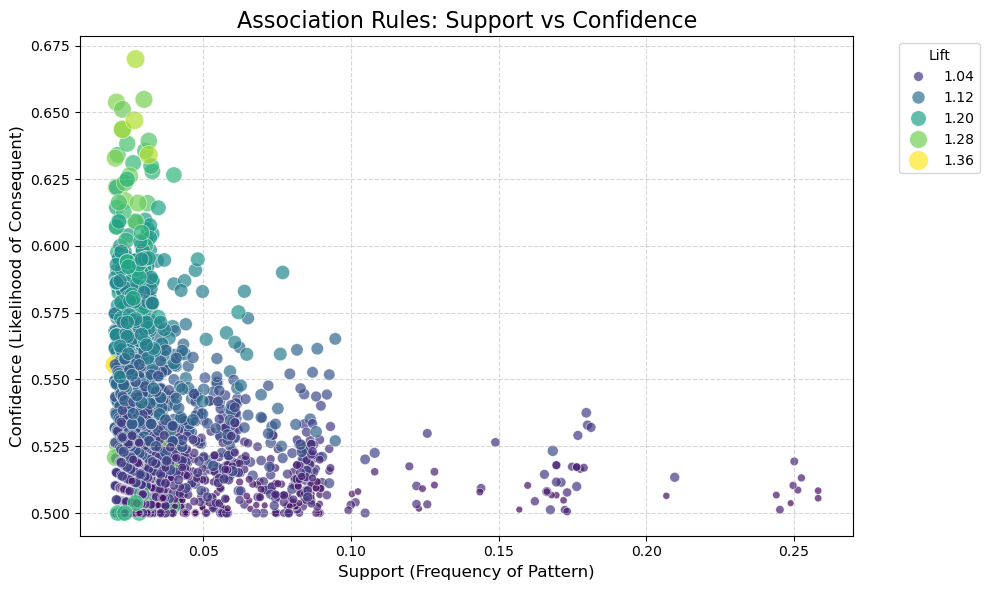

In [22]:
# --- VISUALIZATION 1: Support vs. Confidence Scatter Plot ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rules, 
    x='support', 
    y='confidence', 
    hue='lift', 
    size='lift', 
    sizes=(20, 200), 
    palette='viridis',
    alpha=0.7
)
plt.title('Association Rules: Support vs Confidence', fontsize=16)
plt.xlabel('Support (Frequency of Pattern)', fontsize=12)
plt.ylabel('Confidence (Likelihood of Consequent)', fontsize=12)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Visualization: Top 10 Rules by Lift
This bar chart highlights the **strongest relationships** found in the dataset.
- **Y-axis:** Shows the specific rule (e.g., "If Antecedent -> Then Consequent").
- **X-axis:** Represents the **Lift**, which measures how much more likely the consequent is given the antecedent compared to random chance.
- **Insight:** Higher values indicate a stronger association. These top 10 rules represent the most significant patterns to focus on for decision-making.

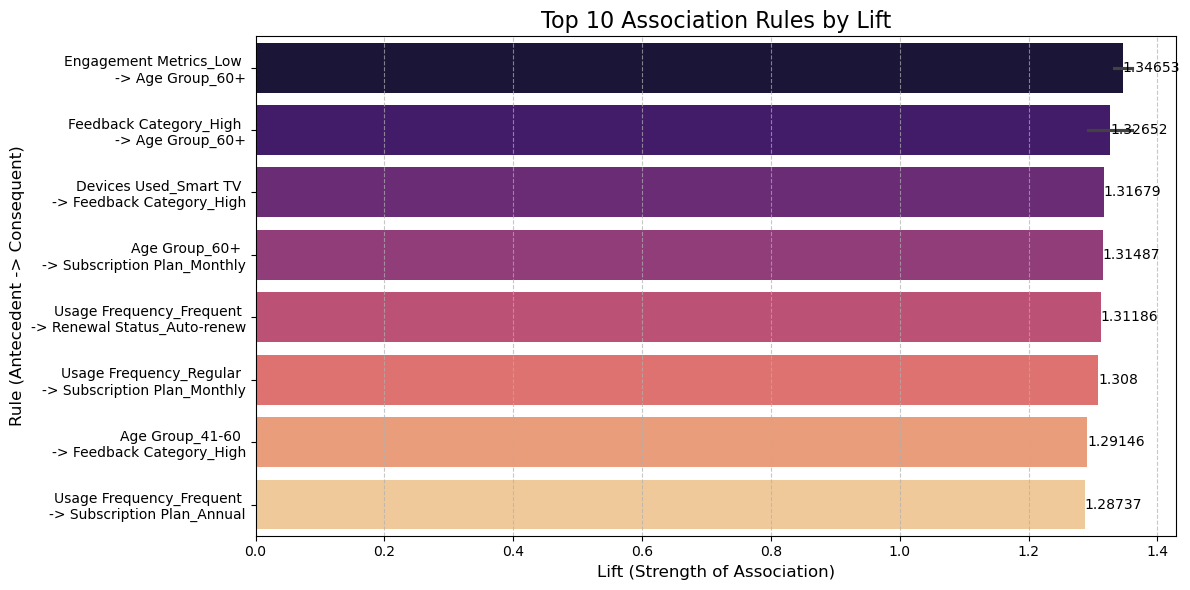

In [28]:
# --- VISUALIZATION 2: Top 10 Rules by Lift (Bar Chart) ---
top_rules = rules.sort_values('lift', ascending=False).head(10)

top_rules['rule_name'] = top_rules.apply(
    lambda x: f"{list(x['antecedents'])[0]} \n-> {list(x['consequents'])[0]}", axis=1
)

plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=top_rules, 
    x='lift', 
    y='rule_name', 
    hue='rule_name',
    palette='magma', 
    legend=False     
)

for container in ax.containers:
	ax.bar_label(container, label_type='edge')
plt.title('Top 10 Association Rules by Lift', fontsize=16)
plt.xlabel('Lift (Strength of Association)', fontsize=12)
plt.ylabel('Rule (Antecedent -> Consequent)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Question 1:
#### Is there a significant association between younger users aged 18–30 with high streaming frequency and their likelihood of providing a ‘High’ (4.1-5) rating for Prime Video content?
Why this question is relevant?
* User demographics, especially age, strongly influence streaming behaviour. Younger users often engage more and have distinct content preferences. Understanding their satisfaction helps evaluate content effectiveness. By understanding younger users, business decisions can be made to attract younger customers and retain them for recurring income.


In [24]:
q1_rules = rules[
    rules['antecedents'].apply(lambda x: 'Age Group_18-30' in x) & 
	rules['consequents'].apply(lambda x: 'Feedback Category_High' in x)
]

q1_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
1283,"(Usage Frequency_Occasional, Age Group_18-30)",(Feedback Category_High),0.023877,0.508621,1.056136


### Question 2:
#### Is there an association between user engagement level, renewal status (Auto-renew), and high satisfaction ratings?
Why this question is relevant
* Engagement metrics reflect how frequently the customers interact with the platform, and auto-renewal indicates the customer’s commitment into the platform. Through this, the business can study if it is linked to positive user experience and recognizes customers’ commitment through auto-renewal.


In [25]:
q2_rules = rules[
	rules['antecedents'].apply(lambda x: any('Engagement Metrics' in item for item in x)) &
	rules['antecedents'].apply(lambda x: any('Renewal Status' in item for item in x)) &
	(rules['antecedents'].apply(len) == 2) &
	rules['consequents'].apply(lambda x: 'Feedback Category_High' in x)
]

q2_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False)

,antecedents,consequents,support,confidence,lift
1122,"(Engagement Metrics_Low, Renewal Status_Auto-renew)",(Feedback Category_High),0.083772,0.520101,1.079973


### Question 3:
#### Is there an association between watching blockbuster genres (Sci-Fi/Action) on Smart TVs and users choosing an Annual subscription plan with Auto-renewal?
Why this question is relevant
* Blockbuster genres such as Sci-Fi and Action are designed for immersive viewing experiences, which may be enhanced by Smart TV usage. Understanding whether users who consume such content via Smart TVs are more inclined toward Annual subscriptions and Auto-renewal helps evaluate whether high-quality viewing environments encourage longer-term subscription commitments.


In [26]:
q3_rules = rules[
	rules['antecedents'].apply(lambda x: any('Genre' in item for item in x)) &
	rules['antecedents'].apply(lambda x: any('Devices Used' in item for item in x)) &
	rules['consequents'].apply(lambda x: any('Annual' in item for item in x)) & 
	rules['consequents'].apply(lambda x: any('Auto-renew' in item for item in x))
]
display(q3_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

,antecedents,consequents,support,confidence,lift


### Question 4:
#### Is there an association between Subscription Plan (Monthly/Annual) with different payment methods (Visa/Mastercard/Amex)and whether users choose Auto-renew or Manual renewal?
Why this question is relevant
* Different subscription plans may influence how committed users feel toward the service. Different payment methods may suggest a potential customer base as card companies may offer promotions to customers. Annual users might prefer auto-renew for convenience, while monthly users may choose manual renewal for flexibility.


In [27]:
q4_rules = rules[
	rules['antecedents'].apply(lambda x: any('Subscription Plan' in item for item in x)) &
	rules['antecedents'].apply(lambda x: any('Payment Information' in item for item in x)) &
	(rules['antecedents'].apply(len) == 2) &
	# (rules['antecedents'].apply(len) == 1) &
	rules['consequents'].apply(lambda x: any('Renewal Status' in item for item in x))
]
display(q4_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False))

,antecedents,consequents,support,confidence,lift
658,"(Subscription Plan_Monthly, Payment Information_Visa)",(Renewal Status_Auto-renew),0.087009,0.552699,1.082187
1466,"(Subscription Plan_Monthly, Payment Information_Amex)",(Renewal Status_Manual),0.084986,0.523691,1.070339
1659,"(Subscription Plan_Annual, Payment Information_Amex)",(Renewal Status_Manual),0.083367,0.522843,1.068606
708,"(Subscription Plan_Annual, Payment Information_Visa)",(Renewal Status_Auto-renew),0.092675,0.524027,1.026047
34,"(Payment Information_Mastercard, Subscription Plan_Annual)",(Renewal Status_Auto-renew),0.089437,0.521226,1.020563
62,"(Payment Information_Mastercard, Subscription Plan_Monthly)",(Renewal Status_Auto-renew),0.088223,0.511737,1.001983
